In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from LSTM_model import LSTM
from LSTM_model import DLSTM



from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [2]:

file_path = '../../data/dataS.csv'
df = pd.read_csv(file_path, parse_dates=['Date'])
df.sort_values('Date', inplace=True, ignore_index=True)

features = ['volatility']
target   = 'volatility_forcast'
data_X   = df[features].values
data_y   = df[[target]].values

In [3]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(data_X)
y_scaled = scaler_y.fit_transform(data_y)


In [4]:
def create_sequences(X, y, seq_length):
    Xs, ys = [], []
    for i in range(len(X) - seq_length):
        Xs.append(X[i : i + seq_length])
        ys.append(y[i + seq_length])
    return np.array(Xs), np.array(ys)


seq_length = 5
X_seq, y_next = create_sequences(X_scaled, y_scaled, seq_length)


In [5]:

X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_next,
    test_size=0.2,
    shuffle=False
)

def build_y_seqs(y_flat, seq_length):
    N = len(y_flat)
    y_seqs = np.zeros((N, seq_length, 1), dtype=float)
    for i in range(N):
        y_seqs[i, :, 0] = y_flat[i]
    return y_seqs

Y_train = build_y_seqs(y_train, seq_length)
Y_test  = build_y_seqs(y_test, seq_length)


In [6]:
model = LSTM(
    input_dim = X_train.shape[2],   # number of features
    hidden_dim= 64,
    output_dim= 1,
    lr        = 1e-3
)

model.train(
    X_train, Y_train,
    epochs     = 100,
    batch_size = 32,
    val_data   = (X_test, Y_test)
)

Epoch 1/100 — train MSE: 0.0060 — val MSE: 0.0038
Epoch 2/100 — train MSE: 0.0045 — val MSE: 0.0036
Epoch 3/100 — train MSE: 0.0045 — val MSE: 0.0040
Epoch 4/100 — train MSE: 0.0044 — val MSE: 0.0037
Epoch 5/100 — train MSE: 0.0044 — val MSE: 0.0036
Epoch 6/100 — train MSE: 0.0044 — val MSE: 0.0036
Epoch 7/100 — train MSE: 0.0043 — val MSE: 0.0037
Epoch 8/100 — train MSE: 0.0043 — val MSE: 0.0036
Epoch 9/100 — train MSE: 0.0044 — val MSE: 0.0037
Epoch 10/100 — train MSE: 0.0043 — val MSE: 0.0037
Epoch 11/100 — train MSE: 0.0043 — val MSE: 0.0038
Epoch 12/100 — train MSE: 0.0043 — val MSE: 0.0036
Epoch 13/100 — train MSE: 0.0043 — val MSE: 0.0037
Epoch 14/100 — train MSE: 0.0043 — val MSE: 0.0036
Epoch 15/100 — train MSE: 0.0044 — val MSE: 0.0036
Epoch 16/100 — train MSE: 0.0043 — val MSE: 0.0038
Epoch 17/100 — train MSE: 0.0043 — val MSE: 0.0036
Epoch 18/100 — train MSE: 0.0043 — val MSE: 0.0037
Epoch 19/100 — train MSE: 0.0043 — val MSE: 0.0036
Epoch 20/100 — train MSE: 0.0043 — val M

In [7]:
preds_seq = model.predict(X_test)         # shape (N_test, seq_length, 1)
preds_last = preds_seq[:, -1, 0]
y_last     = y_test[:, 0]

preds_inv = scaler_y.inverse_transform(preds_last.reshape(-1,1)).flatten()
y_inv     = scaler_y.inverse_transform(y_last.reshape(-1,1)).flatten()

mse   = mean_squared_error(y_inv, preds_inv)
rmse  = np.sqrt(mse)
mae   = mean_absolute_error(y_inv, preds_inv)
mape  = mean_absolute_percentage_error(y_inv, preds_inv)
r2    = r2_score(y_inv, preds_inv)


print("\nFinal Test Metrics:")
print(f"  MSE : {mse:.6f}")
print(f"  RMSE: {rmse:.6f}")
print(f"  MAE : {mae:.6f}")
print(f"  MAPE: {mape:.2%}")
print(f"  R²  : {r2:.4f}")


Final Test Metrics:
  MSE : 0.003161
  RMSE: 0.056224
  MAE : 0.040909
  MAPE: 63.31%
  R²  : 0.4575


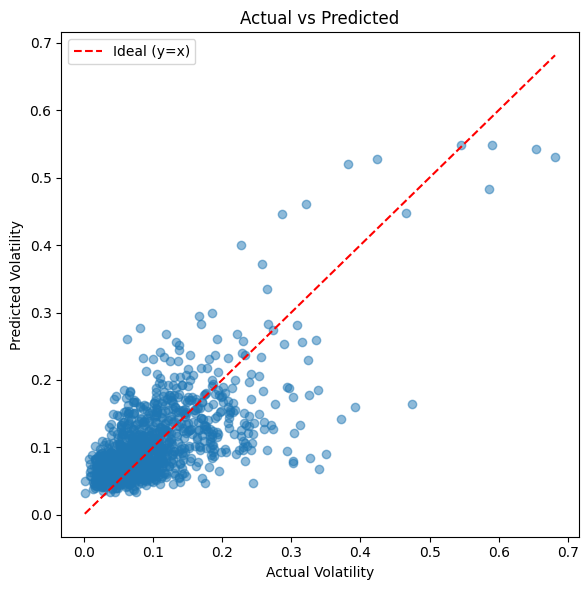

In [8]:
preds_seq = model.predict(X_test)        # (N_test, seq_len, 1)
preds_last = preds_seq[:, -1, 0]
y_last     = y_test[:, 0]

preds_inv = scaler_y.inverse_transform(preds_last.reshape(-1,1)).flatten()
y_inv     = scaler_y.inverse_transform(y_last.reshape(-1,1)).flatten()

plt.figure(figsize=(6,6))
plt.scatter(y_inv, preds_inv, alpha=0.5)
lims = [
    min(y_inv.min(), preds_inv.min()),
    max(y_inv.max(), preds_inv.max())
]
plt.plot(lims, lims, 'r--', label='Ideal (y=x)')
plt.xlabel('Actual Volatility')
plt.ylabel('Predicted Volatility')
plt.title('Actual vs Predicted')
plt.legend()
plt.tight_layout()
plt.show()

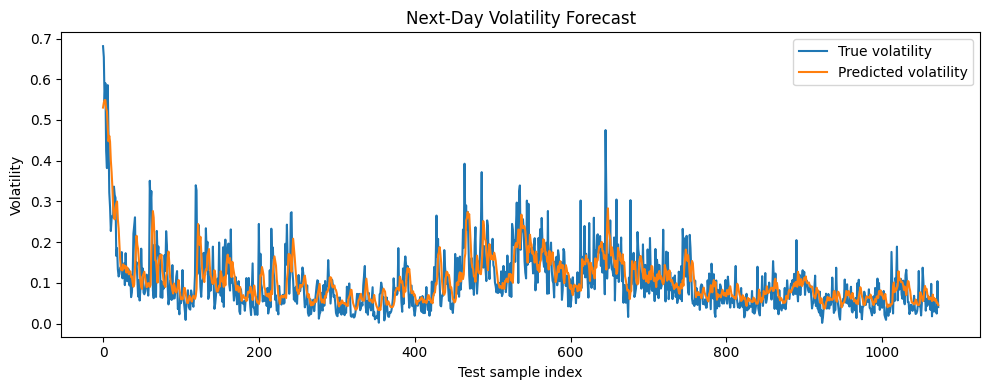

In [9]:
plt.figure(figsize=(10,4))
plt.plot(y_inv,    label='True volatility')
plt.plot(preds_inv, label='Predicted volatility')
plt.title('Next-Day Volatility Forecast')
plt.xlabel('Test sample index')
plt.ylabel('Volatility')
plt.legend()
plt.tight_layout()
plt.show()

### AI generated code to gain time -> be carful with that code

Epoch 1/50 — train MSE: 0.0057 — val MSE: 0.0045
Epoch 2/50 — train MSE: 0.0053 — val MSE: 0.0041
Epoch 3/50 — train MSE: 0.0052 — val MSE: 0.0039
Epoch 4/50 — train MSE: 0.0052 — val MSE: 0.0040
Epoch 5/50 — train MSE: 0.0052 — val MSE: 0.0042
Epoch 6/50 — train MSE: 0.0051 — val MSE: 0.0040
Epoch 7/50 — train MSE: 0.0051 — val MSE: 0.0041
Epoch 8/50 — train MSE: 0.0052 — val MSE: 0.0040
Epoch 9/50 — train MSE: 0.0051 — val MSE: 0.0041
Epoch 10/50 — train MSE: 0.0051 — val MSE: 0.0041
Epoch 11/50 — train MSE: 0.0051 — val MSE: 0.0041
Epoch 12/50 — train MSE: 0.0051 — val MSE: 0.0043
Epoch 13/50 — train MSE: 0.0051 — val MSE: 0.0040
Epoch 14/50 — train MSE: 0.0051 — val MSE: 0.0040
Epoch 15/50 — train MSE: 0.0051 — val MSE: 0.0043
Epoch 16/50 — train MSE: 0.0051 — val MSE: 0.0039
Epoch 17/50 — train MSE: 0.0051 — val MSE: 0.0041
Epoch 18/50 — train MSE: 0.0051 — val MSE: 0.0044
Epoch 19/50 — train MSE: 0.0052 — val MSE: 0.0041
Epoch 20/50 — train MSE: 0.0051 — val MSE: 0.0041
Epoch 21/

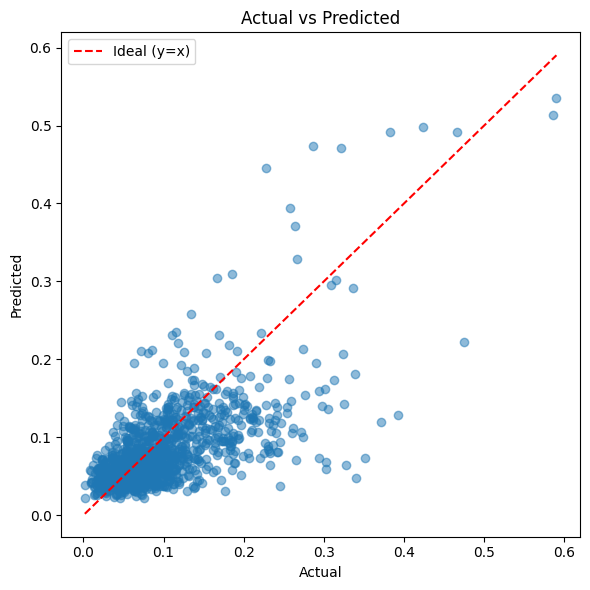

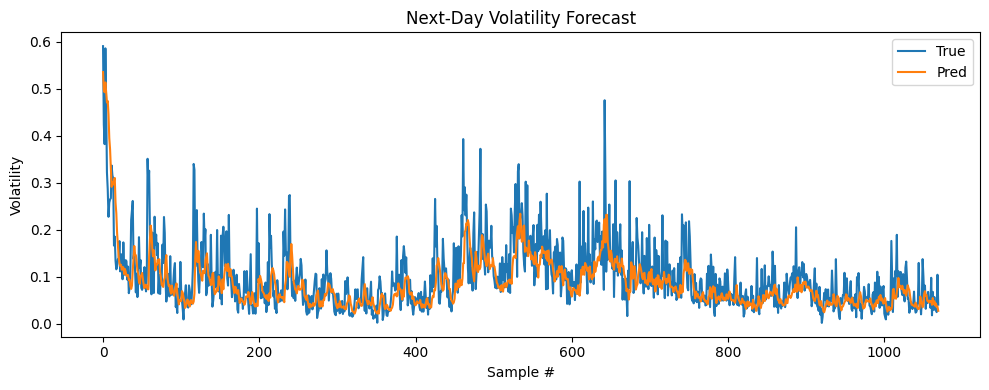

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PyEMD import EMD
from scipy.signal import hilbert

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

# 1) LOAD & COMPUTE per‐t WINDOWS VIA EMD
# ------------------------------------------------
df = pd.read_csv('../../data/datav.csv')
X = df['volatility'].values
N = len(X)
max_W = 100

# EMD decomposition
emd = EMD()
imfs = emd.emd(X)

# instantaneous power and total energy per IMF
all_pow = []
for imf in imfs:
    amp = np.abs(hilbert(imf))
    all_pow.append(amp**2)
energies = [p.mean() for p in all_pow]

# normalized instantaneous power (summed over IMFs)
inst_power_norm = np.zeros(N)
for p, E in zip(all_pow, energies):
    inst_power_norm += p / E

# dynamic window sizes ∈ [1, max_W]
tau_emd = np.clip(np.round(inst_power_norm).astype(int), 1, max_W)


# 2) DEFINE DLSTM WITH CORRECTED forward()
# ------------------------------------------------
class DLSTM:
    def __init__(self, input_dim, hidden_dim, output_dim, lr=1e-3, clip=5.0):
        self.input_dim, self.hidden_dim, self.output_dim = input_dim, hidden_dim, output_dim
        self.lr, self.clip = lr, clip

        def xavier(shape):
            fan_in, fan_out = shape
            limit = np.sqrt(6/(fan_in+fan_out))
            return np.random.uniform(-limit, limit, size=shape)

        D, H = input_dim + hidden_dim, hidden_dim
        self.Wf, self.bf = xavier((D, H)), np.zeros(H)
        self.Wi, self.bi = xavier((D, H)), np.zeros(H)
        self.Wc, self.bc = xavier((D, H)), np.zeros(H)
        self.Wo, self.bo = xavier((D, H)), np.zeros(H)
        self.Wy, self.by = xavier((H, output_dim)), np.zeros(output_dim)

        # Adam state
        self.m = {n: np.zeros_like(getattr(self, n)) for n in
                  ['Wf','bf','Wi','bi','Wc','bc','Wo','bo','Wy','by']}
        self.v = {n: np.zeros_like(getattr(self, n)) for n in self.m}
        self.beta1, self.beta2, self.eps = 0.9, 0.999, 1e-8
        self.t = 0

    @staticmethod
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))

    def forward(self, x, S):
        """
        x: (seq_len, batch, input_dim)
        S: (seq_len, batch) dynamic window sizes
        """
        T, B, _ = x.shape
        h = np.zeros((B, self.hidden_dim))
        c = np.zeros((B, self.hidden_dim))
        self.cache = []
        y_seq = np.zeros((T, B, self.output_dim))

        for t in range(T):
            z = np.hstack([h, x[t]])                # (B, D)
            u_f = z.dot(self.Wf) + self.bf         # forget‐preact
            f0  = self.sigmoid(u_f)

            # >>> here’s the fix: per‐batch ratio w_t[b] = S[t,b]/S[t-1,b]
            if t == 0:
                w_t = np.ones(B, dtype=float)
            else:
                w_t = S[t, :] / (S[t-1, :] + 1e-12)  # (B,)
            # broadcast across hidden_dim:
            f = f0 * w_t[:, None]

            i       = self.sigmoid(z.dot(self.Wi) + self.bi)
            c_tilde = np.tanh(   z.dot(self.Wc) + self.bc)
            c       = f * c + i * c_tilde
            o       = self.sigmoid(z.dot(self.Wo) + self.bo)
            h       = o * np.tanh(c)
            y       = h.dot(self.Wy) + self.by

            self.cache.append((z, u_f, f0, w_t, f, i, c_tilde, c, o, h))
            y_seq[t] = y

        return y_seq

    def backward(self, x, dy):
        T, B, _ = x.shape
        grads = {n: np.zeros_like(getattr(self, n)) for n in self.m}
        dh_next = np.zeros((B, self.hidden_dim))
        dc_next = np.zeros_like(dh_next)

        for t in reversed(range(T)):
            (z, u_f, f0, w_t, f, i, c_tilde, c, o, h) = self.cache[t]
            dy_t = dy[t]

            # output‐layer grads
            grads['Wy'] += h.T.dot(dy_t)
            grads['by'] += dy_t.sum(axis=0)
            dh = dy_t.dot(self.Wy.T) + dh_next

            # o‐gate
            do    = dh * np.tanh(c)
            du_o  = do * o * (1 - o)

            # cell‐state
            dc    = dh * o * (1 - np.tanh(c)**2) + dc_next

            # i‐gate
            di    = dc * c_tilde
            du_i  = di * i * (1 - i)

            # c~ gate
            dc_tu = dc * i
            du_c  = dc_tu * (1 - c_tilde**2)

            # forget‐gate
            c_prev = self.cache[t-1][7] if t>0 else np.zeros_like(c)
            df     = dc * c_prev
            du_f0  = df * w_t[:, None]
            du_f   = du_f0 * f0 * (1 - f0)

            # accumulate
            for name, dgate in [
                ('Wf',du_f),('bf',du_f),
                ('Wi',du_i),('bi',du_i),
                ('Wc',du_c),('bc',du_c),
                ('Wo',du_o),('bo',du_o)
            ]:
                if name.startswith('W'):
                    grads[name] += z.T.dot(dgate)
                else:
                    grads[name] += dgate.sum(axis=0)

            # backprop to prev hidden
            dz = (du_f.dot(self.Wf.T)
                + du_i.dot(self.Wi.T)
                + du_c.dot(self.Wc.T)
                + du_o.dot(self.Wo.T))
            dh_next = dz[:, :self.hidden_dim]
            dc_next = f * dc

        # Adam update
        for name, g in grads.items():
            np.clip(g, -self.clip, self.clip, out=g)
            self._adam(name, g)

    def _adam(self, name, grad):
        self.t += 1
        m, v = self.m[name], self.v[name]
        m[:] = self.beta1*m + (1-self.beta1)*grad
        v[:] = self.beta2*v + (1-self.beta2)*(grad**2)
        m_hat = m/(1-self.beta1**self.t)
        v_hat = v/(1-self.beta2**self.t)
        upd = self.lr * m_hat/(np.sqrt(v_hat) + self.eps)
        setattr(self, name, getattr(self, name) - upd)

    def train(self, X, Y, S, epochs=20, batch_size=32, val_data=None):
        N = X.shape[0]
        for ep in range(1, epochs+1):
            perm = np.random.permutation(N)
            X, Y, S = X[perm], Y[perm], S[perm]
            loss = 0
            for i in range(0, N, batch_size):
                xb = X[i:i+batch_size].transpose(1,0,2)
                yb = Y[i:i+batch_size].transpose(1,0,2)
                sb = S[i:i+batch_size]               # (B, seq_len)
                preds = self.forward(xb, sb.T)       # sb.T → (seq_len, B)
                dy = (preds - yb) / yb.shape[1]
                loss += np.mean((preds - yb)**2)
                self.backward(xb, dy)
            loss /= (N//batch_size)
            msg = f"Epoch {ep}/{epochs} — train MSE: {loss:.4f}"
            if val_data:
                Xv, Yv, Sv = val_data
                pv = self.forward(Xv.transpose(1,0,2), Sv.T)
                vloss = np.mean((pv - Yv.transpose(1,0,2))**2)
                msg += f" — val MSE: {vloss:.4f}"
            print(msg)

    def predict(self, X, S):
        out = self.forward(X.transpose(1,0,2), S.T)
        return out.transpose(1,0,2)


# 3) BUILD SEQUENCES FOR TRAINING
# ------------------------------------------------
def create_dynamic_sequences(X, y, tau, seq_len):
    Xs, ys, Ss = [], [], []
    for i in range(len(X) - seq_len):
        Xs.append(X[i:i+seq_len])
        ys.append(y[i+seq_len])
        Ss.append(tau[i:i+seq_len])
    return np.array(Xs), np.array(ys), np.array(Ss)

# Read full series with your target column
df2 = pd.read_csv('../../data/dataS.csv', parse_dates=['Date'])
df2.sort_values('Date', inplace=True)
vol = df2['volatility'].values.reshape(-1,1)
fwd = df2['volatility_forcast'].values.reshape(-1,1)

# scale
scX = MinMaxScaler(); scY = MinMaxScaler()
Xscl = scX.fit_transform(vol)
Yscl = scY.fit_transform(fwd)

# build sequences
seq_length = 20
X_seq, y_flat, S_seq = create_dynamic_sequences(Xscl, Yscl, tau_emd, seq_length)

# expand y into (N, seq_len, 1)
Nseq = len(y_flat)
Y_seq = np.zeros((Nseq, seq_length, 1))
for i in range(Nseq):
    Y_seq[i, :, 0] = y_flat[i]

# train/test split
X_tr, X_te, Y_tr, Y_te, S_tr, S_te = train_test_split(
    X_seq, Y_seq, S_seq,
    test_size=0.2, shuffle=False
)


# 4) TRAIN, EVALUATE & PLOT
# ------------------------------------------------
model = DLSTM(input_dim=1, hidden_dim=64, output_dim=1, lr=1e-3)
model.train(
    X_tr, Y_tr, S_tr,
    epochs=50, batch_size=32,
    val_data=(X_te, Y_te, S_te)
)

# predict
pred_seq = model.predict(X_te, S_te)   # (N_test, seq_len, 1)
pred_last= pred_seq[:, -1, 0]
y_last   = y_flat[-len(pred_last):]

# inverse‐scale
pred_inv = scY.inverse_transform(pred_last.reshape(-1,1)).flatten()
y_inv    = scY.inverse_transform(y_last.reshape(-1,1)).flatten()

# metrics
mse  = mean_squared_error(y_inv, pred_inv)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_inv, pred_inv)
mape = mean_absolute_percentage_error(y_inv, pred_inv)
r2   = r2_score(y_inv, pred_inv)

print("\nTest metrics:")
print(f"  MSE : {mse:.6f}")
print(f"  RMSE: {rmse:.6f}")
print(f"  MAE : {mae:.6f}")
print(f"  MAPE: {mape:.2%}")
print(f"  R²  : {r2:.4f}")

# scatter & time‐series plots
plt.figure(figsize=(6,6))
plt.scatter(y_inv, pred_inv, alpha=0.5)
lims = [min(y_inv.min(), pred_inv.min()), max(y_inv.max(), pred_inv.max())]
plt.plot(lims, lims, 'r--', label='Ideal (y=x)')
plt.xlabel('Actual'); plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend(); plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
plt.plot(y_inv,    label='True')
plt.plot(pred_inv, label='Pred')
plt.title('Next‐Day Volatility Forecast')
plt.xlabel('Sample #'); plt.ylabel('Volatility')
plt.legend(); plt.tight_layout()
plt.show()
